<a href="https://colab.research.google.com/github/lopes-adriano/lia1-2023-1/blob/main/bears.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Aula 2 do curso da Fast AI

Aluno: Adriano Ferreira Lopes

Matrícula: 201802671

## Bears

### Importando bibliotecas

In [ ]:
!pip install -Uqq -q fastbook
import fastbook
fastbook.setup_book()
    
from fastbook import *
from fastai.vision.widgets import *

### Adquirindo imagens

#### Testando a busca

In [ ]:
imgs = search_images_ddg('grizzly bear')
len(imgs)

200

In [ ]:
dest = 'images/grizzly.jpg'
download_url(imgs[0], dest)

Path('images/grizzly.jpg')

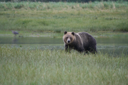

In [ ]:
im = Image.open(dest)
im.to_thumb(128,128)

#### Estruturando o diretório e baixando as imagens

In [ ]:

bear_types = ['grizzly','black','teddy']
path = Path('bears')

if not path.exists():
    path.mkdir()
    for o in bear_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_ddg(f'{o} bear')
        download_images(dest, urls=results)

In [ ]:
fns = get_image_files(path)
fns

(#556) [Path('bears/teddy/6cdbce12-dde3-4536-af52-d853405e78bf.jpg'),Path('bears/teddy/2abcfca4-ca1c-4cdc-accc-f8a88f5d299c.jpg'),Path('bears/teddy/a216b8a5-0607-4c5e-afb8-be82cc7ec860.jpg'),Path('bears/teddy/398f57a6-606b-451f-93c3-033f84ea3657.png'),Path('bears/teddy/a7590c09-37c5-45e6-8461-cead13b27ce8.jpg'),Path('bears/teddy/fa978bbb-6a98-42ff-a2e9-49c22217d912.jpg'),Path('bears/teddy/a0bb8341-c588-40bc-94af-9c8989156d87.jpg'),Path('bears/teddy/aa7d1542-107c-4650-bc78-702d6ffbf40a.jpg'),Path('bears/teddy/4702b599-98e1-4007-bd07-bd1dbd5ccd16.jpg'),Path('bears/teddy/904be79b-57c9-43f4-903a-208b2804e5e0.jpg')...]

#### Verificando e excluindo falhas

In [ ]:

failed = verify_images(fns)
failed

(#21) [Path('bears/teddy/4702b599-98e1-4007-bd07-bd1dbd5ccd16.jpg'),Path('bears/teddy/b0bdf9ab-a726-4947-8bed-c4ac9bef4d27.jpg'),Path('bears/teddy/417442bb-3736-42d1-8448-e426b3c1b009.JPG'),Path('bears/teddy/c566593e-d338-4cb1-8153-6228afc7dc47.jpg'),Path('bears/teddy/08e1d25f-7241-462c-b266-c2ec1cce1a68.jpg'),Path('bears/teddy/98e71002-7186-42f4-aa52-d5d6bbd527b9.jpg'),Path('bears/teddy/949552fe-1fac-4588-a664-c1a4a89816e9.png'),Path('bears/teddy/5f457279-0008-468b-b9bd-8a672f13b96f.jpg'),Path('bears/teddy/c912d6d9-c9ef-4177-8c90-a71c43f4dd94.jpg'),Path('bears/teddy/b34410a5-e9c6-442c-b9b1-637385ce4440.jpg')...]

In [ ]:
failed.map(Path.unlink)

(#21) [None,None,None,None,None,None,None,None,None,None...]

### Criando o dataset

In [ ]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [ ]:
dls = bears.dataloaders(path)

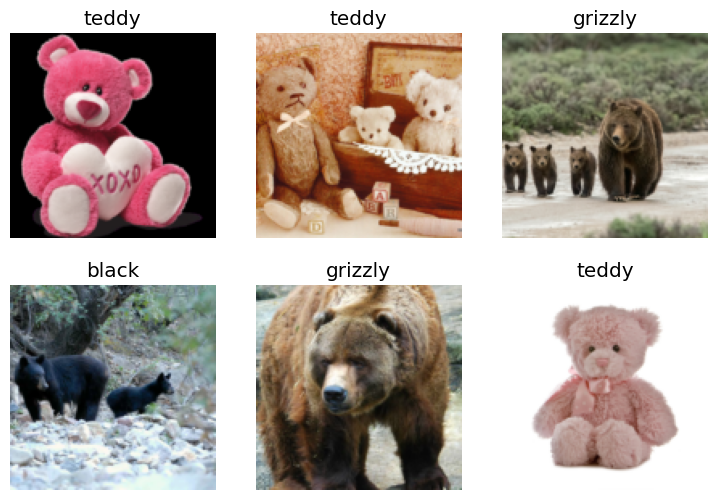

In [ ]:
dls.valid.show_batch(max_n=6, nrows=2)

#### Transformando as imagens com diferentes métodos

**Squish**

>'Espreme' a imagem para a dimensão especificada

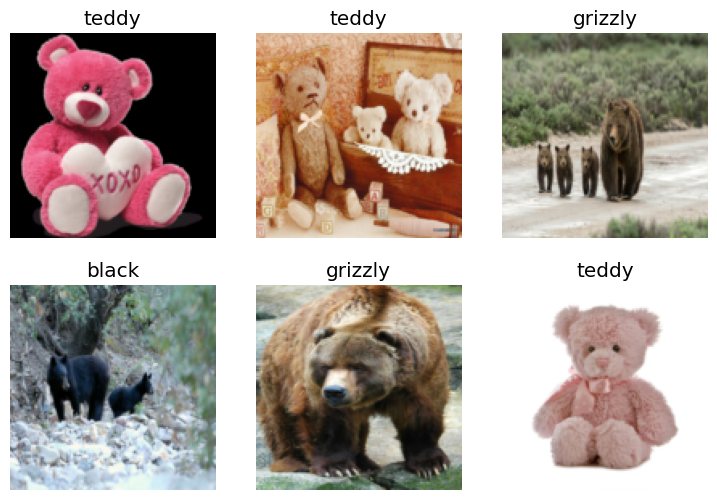

In [ ]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=6, nrows=2)

**Padding**

>Preenche a imagem

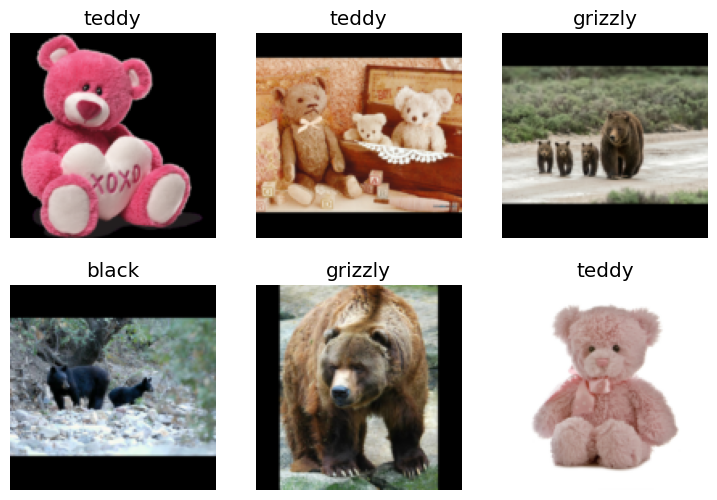

In [ ]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=6, nrows=2)

**Random Resized Crop**

>Cria recortes diferentes da mesma imagem.

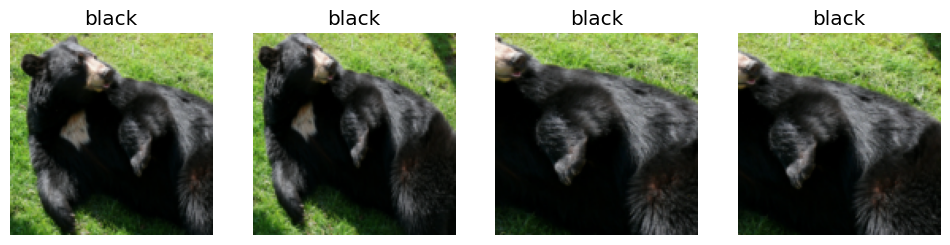

In [ ]:
bears = bears.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

**Data Augmentation**


> Cria diferentes instâncias das imagens utilizando diversas transformações.

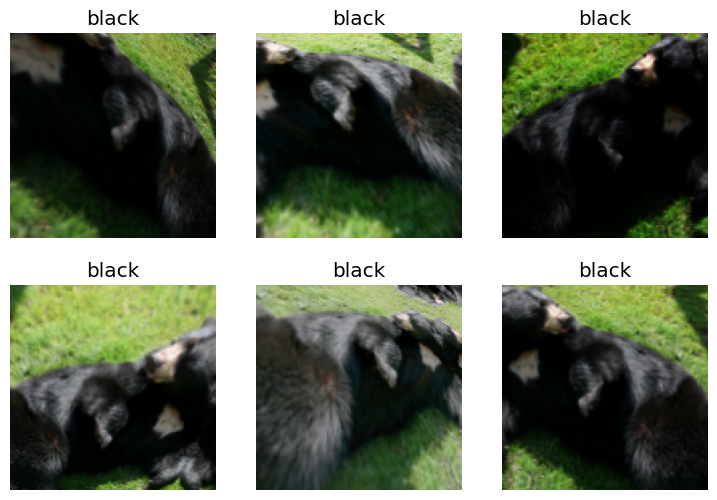

In [ ]:
bears = bears.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=6, nrows=2, unique=True)

### Treinando o modelo

In [ ]:
bears = bears.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = bears.dataloaders(path)

In [ ]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 166MB/s]


#### Interpretando os resultados

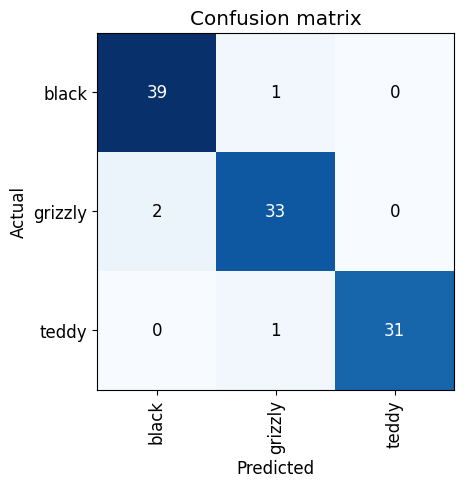

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

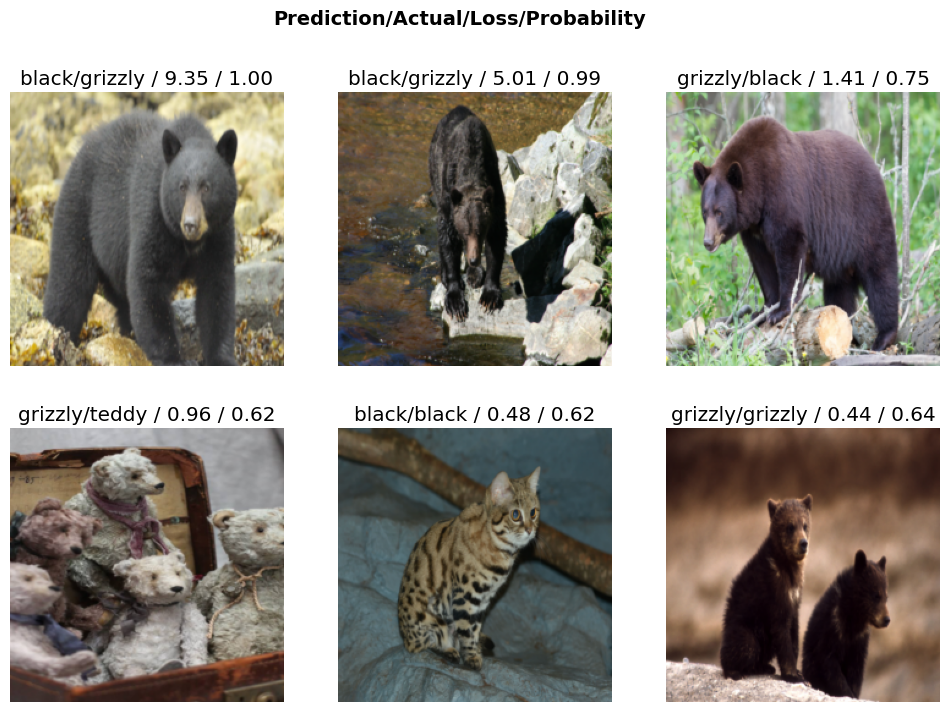

In [ ]:
interp.plot_top_losses(6, nrows=2,figsize = (12,8))

Podemos notar labels incorretas que estão atrapalhando os resultados do modelo.

### Limpando os dados

In [ ]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [ ]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx, cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

### Exportanto o modelo

In [ ]:
learn.export('bears.pkl')
learn_inf = load_learner('bears.pkl')


#### Testando o modelo exportado

In [ ]:
learn_inf.predict('images/grizzly.jpg')

('grizzly', tensor(1), tensor([1.0061e-03, 9.9888e-01, 1.1261e-04]))

In [ ]:
learn_inf.dls.vocab

['black', 'grizzly', 'teddy']

### Criando um app para o modelo

In [ ]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [ ]:
img = PILImage.create(btn_upload.data[-1])

In [ ]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [ ]:
pred, pred_idx, probs = learn_inf.predict(img)
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred


Label(value='Prediction: teddy; Probability: 1.0000')

In [ ]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [ ]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred, pred_idx, probs = learn_inf.predict(img)
    lbl_pred.value = f'Predicition: {pred}; Probability: {probs[pred_idx]:.04f}'
    
btn_run.on_click(on_click_classify)

In [ ]:
btn_upload = widgets.FileUpload()

In [ ]:
VBox([widgets.Label('Select your bear!'),
     btn_upload, btn_run, out_pl, lbl_pred])